In [1]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv

--2020-08-28 10:10:19--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519 [text/plain]
Saving to: ‘shampoo.csv’

shampoo.csv         100%[===================>]     519  --.-KB/s    in 0s      

2020-08-28 10:10:19 (29.5 MB/s) - ‘shampoo.csv’ saved [519/519]



## UPSAMPLING DATA

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


Month
1901-01-01    266.0
1901-01-02      NaN
1901-01-03      NaN
1901-01-04      NaN
1901-01-05      NaN
1901-01-06      NaN
1901-01-07      NaN
1901-01-08      NaN
1901-01-09      NaN
1901-01-10      NaN
1901-01-11      NaN
1901-01-12      NaN
1901-01-13      NaN
1901-01-14      NaN
1901-01-15      NaN
1901-01-16      NaN
1901-01-17      NaN
1901-01-18      NaN
1901-01-19      NaN
1901-01-20      NaN
1901-01-21      NaN
1901-01-22      NaN
1901-01-23      NaN
1901-01-24      NaN
1901-01-25      NaN
1901-01-26      NaN
1901-01-27      NaN
1901-01-28      NaN
1901-01-29      NaN
1901-01-30      NaN
1901-01-31      NaN
1901-02-01    145.9
Freq: D, Name: Sales, dtype: float64


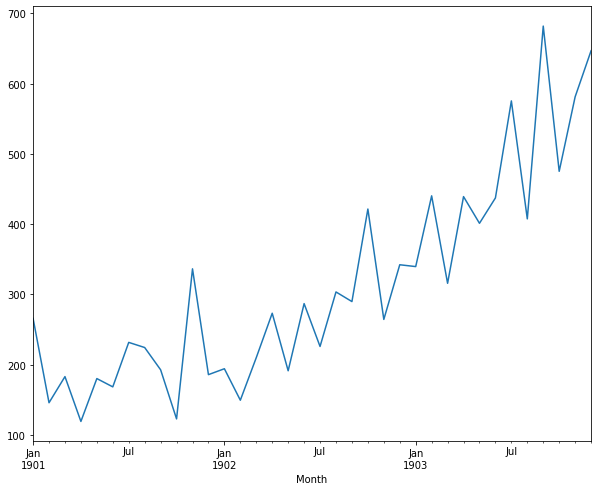

In [15]:
# upsample to daily intervals
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
upsampled = series.resample('D').mean()
print(upsampled.head(32))

plt.figure(figsize=(10,8))
series.plot()
plt.show()   

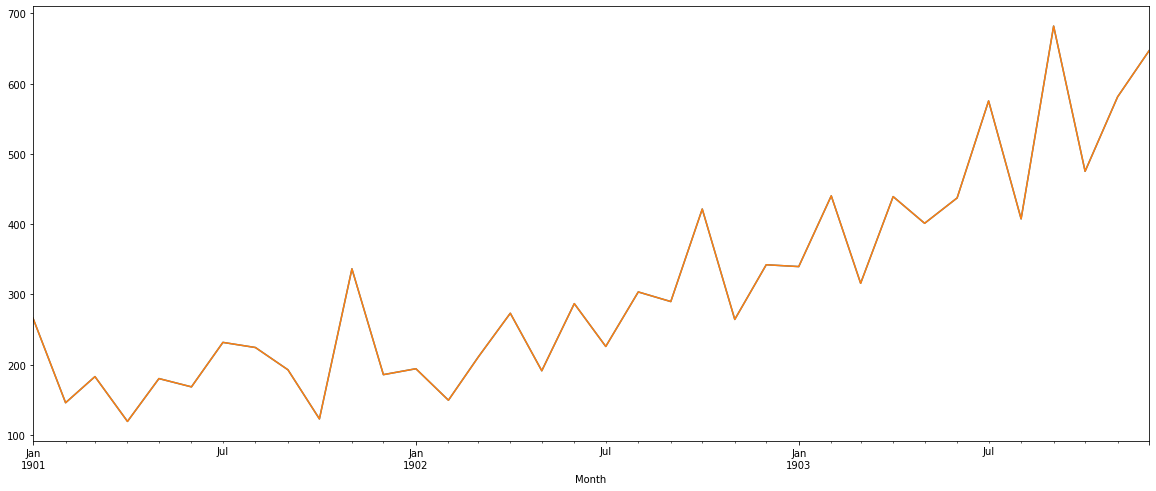

In [22]:
# upsample to daily intervals with linear interpolation

interpolated_linear = upsampled.interpolate(method='linear')
interpolated_quadratic = upsampled.interpolate(method='quadratic')
interpolated_cubic = upsampled.interpolate(method='cubic')
interpolated_polynomial = upsampled.interpolate(method='polynomial', order=5)
# print(interpolated_linear.head(32))
plt.figure(figsize=(20,8))
series.plot()
interpolated_linear.plot()
plt.show()

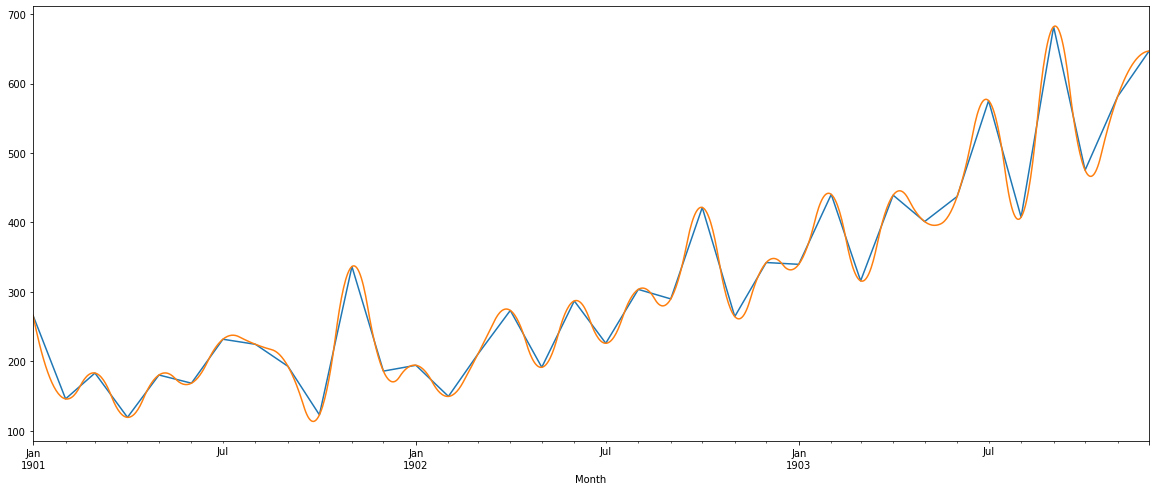

In [24]:
plt.figure(figsize=(20,8))
series.plot()
interpolated_quadratic.plot()
plt.show()

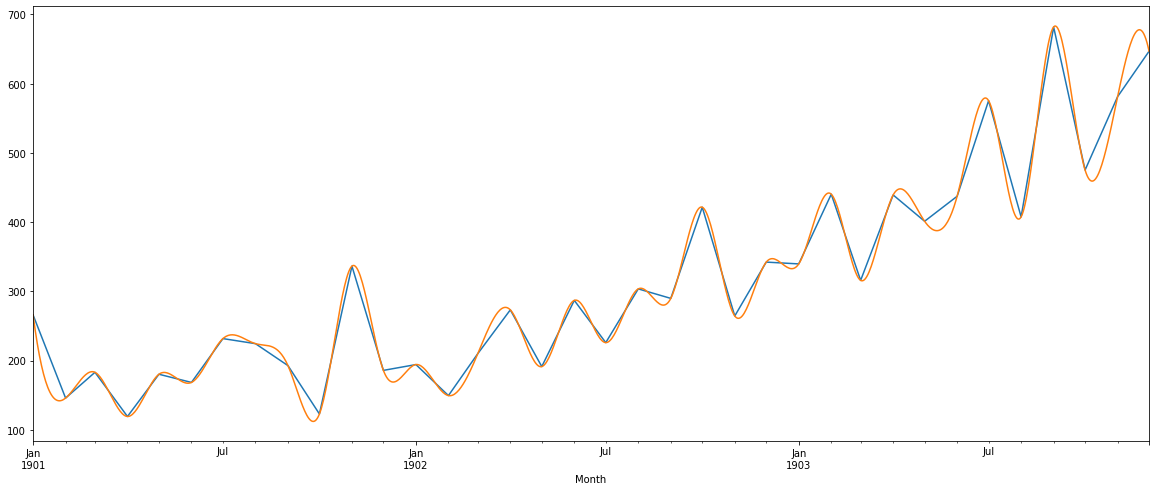

In [25]:
plt.figure(figsize=(20,8))
series.plot()
interpolated_cubic.plot()
plt.show()

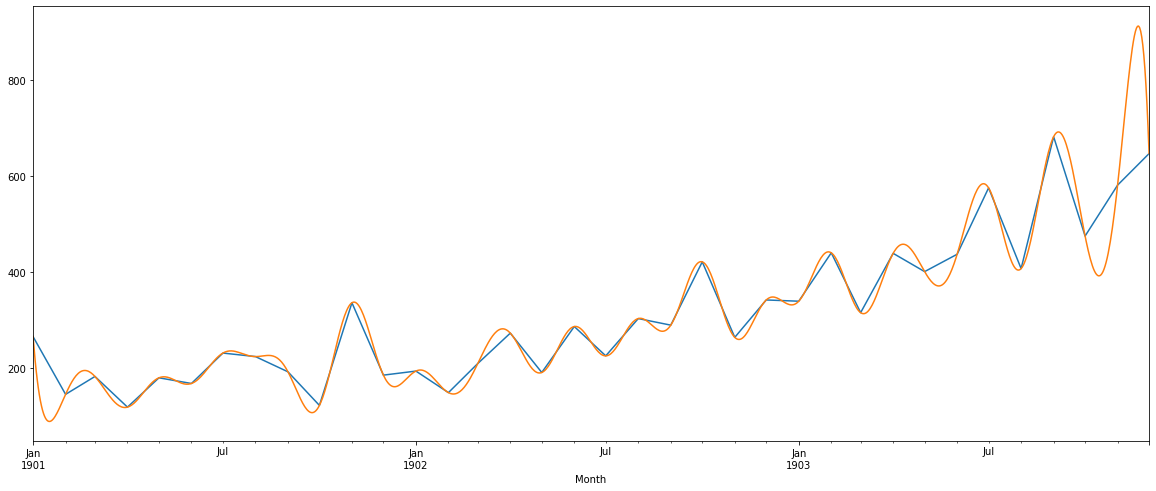

In [26]:
plt.figure(figsize=(20,8))
series.plot()
interpolated_polynomial.plot()
plt.show()

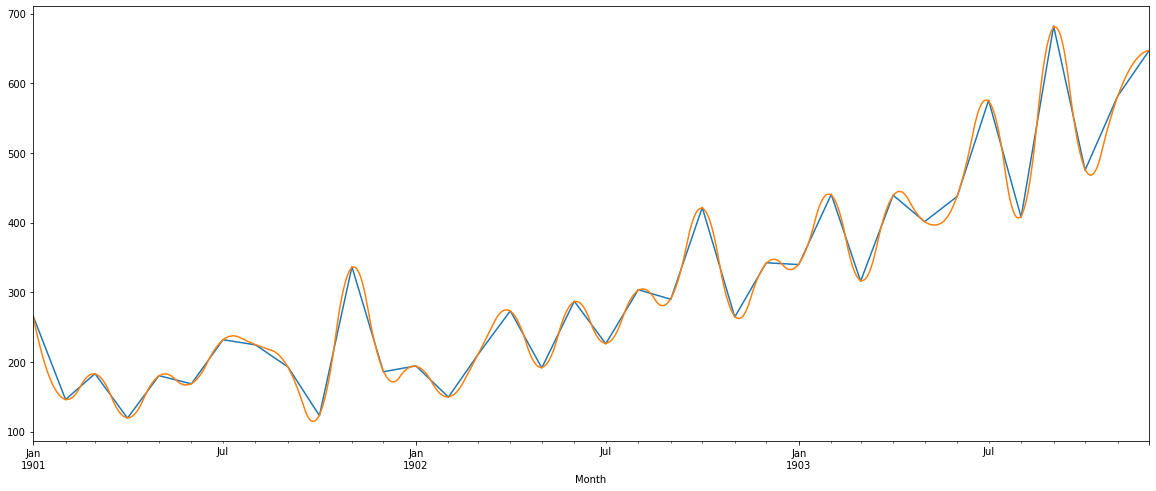

In [28]:
plt.figure(figsize=(20,8))
series.plot()
interpolated_spline = upsampled.interpolate(method='spline', order=2)
interpolated_spline.plot()
plt.show()

## DOWNSAMPLING

Month
1901-03-31    198.333333
1901-06-30    156.033333
1901-09-30    216.366667
1901-12-31    215.100000
1902-03-31    184.633333
Freq: Q-DEC, Name: Sales, dtype: float64


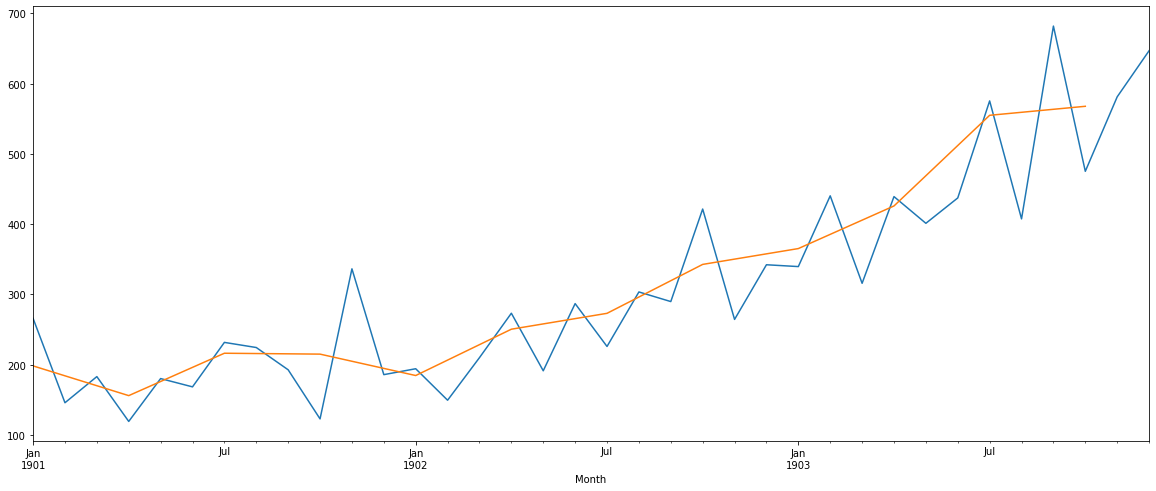

In [31]:
resample = series.resample('Q')
quarterly_mean_sales = resample.mean()
print(quarterly_mean_sales.head())
plt.figure(figsize=(20,8))
series.plot()
quarterly_mean_sales.plot()
plt.show()

Month
1901-12-31    2357.5
1902-12-31    3153.5
1903-12-31    5742.6
Freq: A-DEC, Name: Sales, dtype: float64


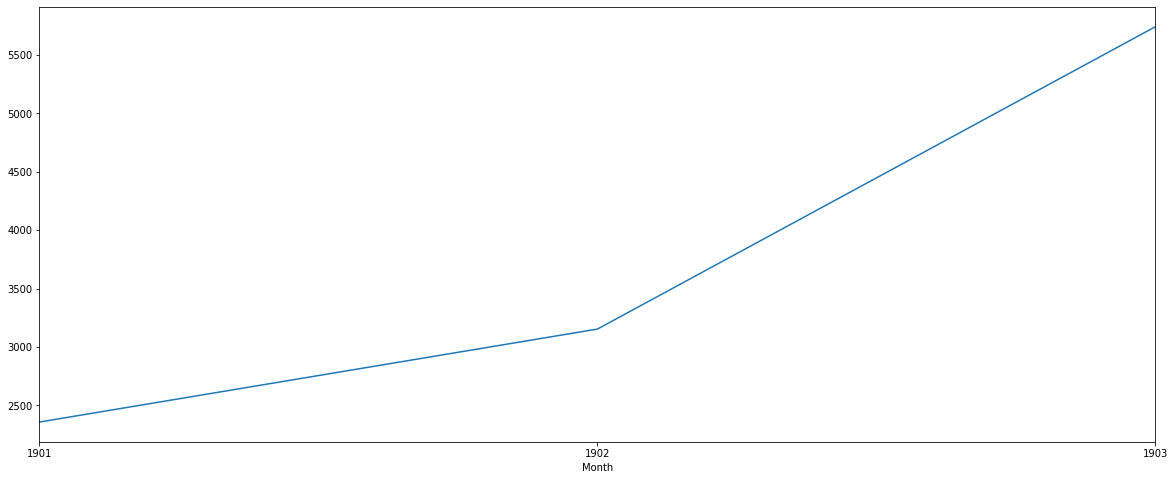

In [33]:
resample = series.resample('A')
yearly_mean_sales = resample.sum()
print(yearly_mean_sales.head())

plt.figure(figsize=(20,8))
# series.plot()
yearly_mean_sales.plot()
plt.show()